In [1]:
import seaborn as sns
import glob
from numpy import genfromtxt
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
import numpy as np
# from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import os
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
# test set theo ngay.
# one hot encoder, chon feature co mat tren 90%
# Khong co thong tin thi bo.

/data/hoan/mybin/miniconda3/envs/py36/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
## Use pangegenome graph + combine with their features (pangenome)

In [3]:
## Cung features nhu cua ho, tuc la so sanh 2 pangenome

In [4]:
# data_dir = glob.glob("/data/hoan/amromics/prediction/output/PanPred/*")
# parent_dir =  '/data/hoan/amromics/prediction/output/predPantaPanPred_v5/'
# parent_dir = '/data/hoan/amromics/prediction/output/pantaEcoli1936align_v4/'
# parent_dir =  '/data/hoan/amromics/prediction/output/predPantaPanPred_classifierchain_v1/'
parent_dir =  '/data/hoan/amromics/prediction/output/predPantaPanPred_v6/'
data_dir = glob.glob(parent_dir + '*')

In [5]:
data_dir[:2]

['/data/hoan/amromics/prediction/output/predPantaPanPred_v6/Ecoli1936_CTZ_run_0_fold_0_pantaVT10_test_true_labels.csv',
 '/data/hoan/amromics/prediction/output/predPantaPanPred_v6/Ecoli1936_CTZ_run_0_fold_0_pantaVT10_LightGBM_labels.csv']

In [6]:
info = data_dir[0].split('/')[-1].split('_')
# info

In [7]:
# # # Move PanPred to new directory
# parent_dir =  '/data/hoan/amromics/prediction/output/predPantaPanPred_v4/'
# data_dir = glob.glob(parent_dir + '*')
# for idx in range(len(data_dir)):
#     info = data_dir[idx].split('/')[-1].split('_')
#     # if info[6] in ['PanPred', 'PanPredCombine']: 
#     if info[6] in ['pantaSnp']:
#         # print(data_dir[idx])
#         os.system('cp ' + data_dir[idx]+ ' /data/hoan/amromics/prediction/output/predPantaPanPred_v5')

In [8]:
dataset = []; run = []; method = []; MlAlg = []; F1score = []; AMR = []; accuracy = [];
for idx in range(len(data_dir)):
    info = data_dir[idx].split('/')[-1].split('_')
    if info[7] != 'test': 
            # print(data_dir[idx])
            data_id = info[0]+'_'+info[1]
            true_labels_path=parent_dir+data_id+'_run_'+info[3]+'_'+ 'fold_'+info[5]+'_PanPred_test_true_labels.csv'
            y_true = genfromtxt(true_labels_path, delimiter=',').astype(int)
            y_predict = genfromtxt(data_dir[idx], delimiter=',').astype(int)
            if len(y_true)==len(y_predict):
                dataset.append(data_id)
                AMR.append(info[1])
                run.append(10*int(info[3]) + int(info[5]))
                # method.append(info[4]+'_'+info[5])
                method.append(info[6])
                MlAlg.append(info[7])
                # F1score.append(f1_score(y_true, y_predict, pos_label=1))
                F1score.append(recall_score(y_true, y_predict))
                accuracy.append(accuracy_score(y_true, y_predict))
                # if info[6]=='pantaHighGene':
                #     print(dataset[-1], accuracy[-1])

In [9]:
df = pd.DataFrame({'Dataset': dataset, 'AMR': AMR, 'Run': run, 'Method':method, 'ML': MlAlg, 'F1_score': F1score, 'Accuracy': accuracy})

In [10]:
df.drop(df[df.Method == 'pantaPangenomeNoHGNoFS'].index, inplace=True)
# df.drop(df[df.Method == 'pantaPangenomeFSVT0'].index, inplace=True)

In [11]:
amr_list = np.unique(df['AMR'])
ML_list = np.unique(df['ML'])
method_list = np.unique(df['Method'])

In [12]:
amr_list, ML_list, method_list

(array(['AMC', 'AMP', 'AMX', 'CET', 'CIP', 'CTX', 'CTZ', 'CXM', 'GEN',
        'TBM', 'TMP', 'TZP'], dtype=object),
 array(['LightGBM'], dtype=object),
 array(['PanPred', 'PanPredCombine', 'pantaAMRKmer', 'pantaAMRKmerVT1',
        'pantaCombineAMRKmer', 'pantaCombineAMRKmerVT1',
        'pantaCombineCoreGene', 'pantaCombineDifferSite',
        'pantaCombineGFilterHighGeneNeighborVT5', 'pantaCombineSimSite',
        'pantaCombineSimSiteCS1', 'pantaCombineVT10',
        'pantaCombineVT10GeneFold0', 'pantaCombineVT10GeneFold1',
        'pantaCombineVT10GeneFold2', 'pantaCombineVT10GeneFold3',
        'pantaCoreGene', 'pantaDifferSite',
        'pantaGFilterHighGeneNeighborVT5', 'pantaPangenome',
        'pantaSimSite', 'pantaSimSiteColsum1pct', 'pantaVT10',
        'pantaVT10GeneFold0', 'pantaVT10GeneFold1', 'pantaVT10GeneFold2',
        'pantaVT10GeneFold3'], dtype=object))

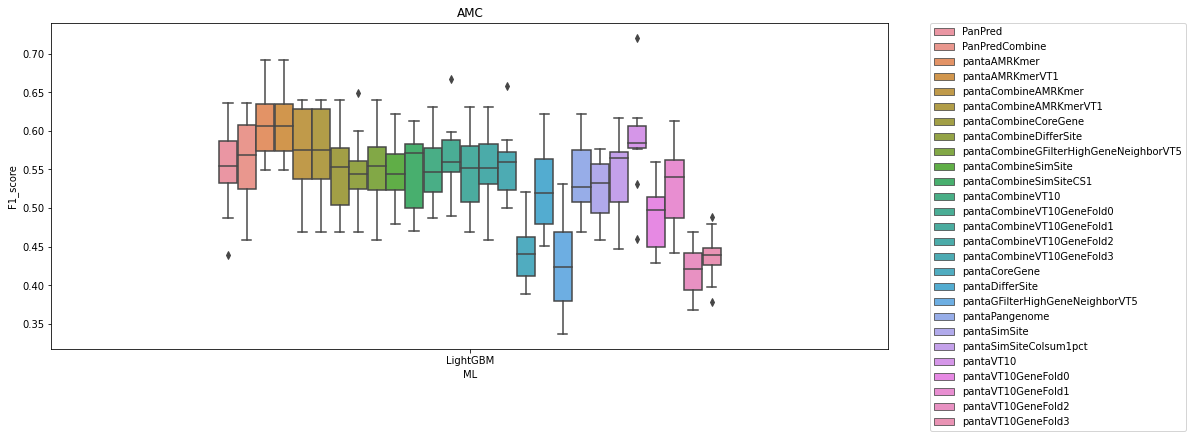

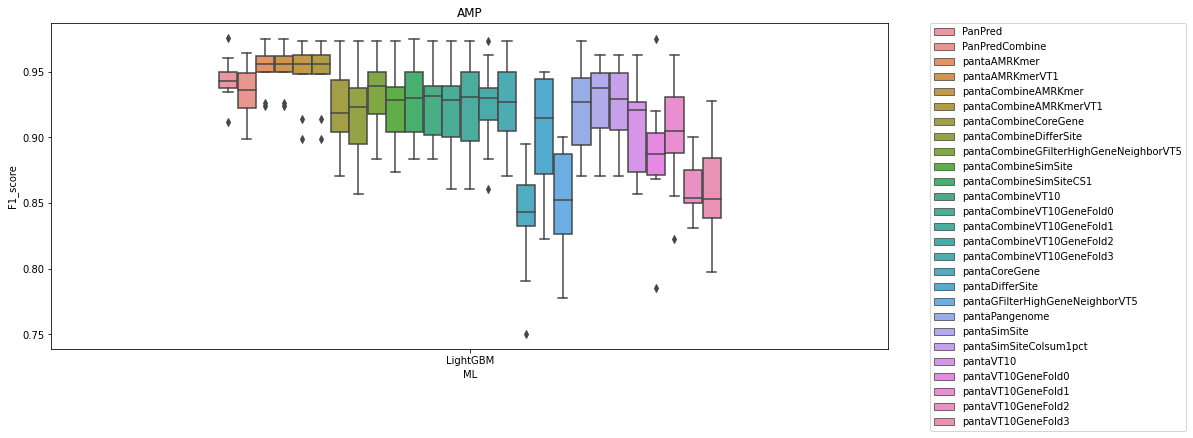

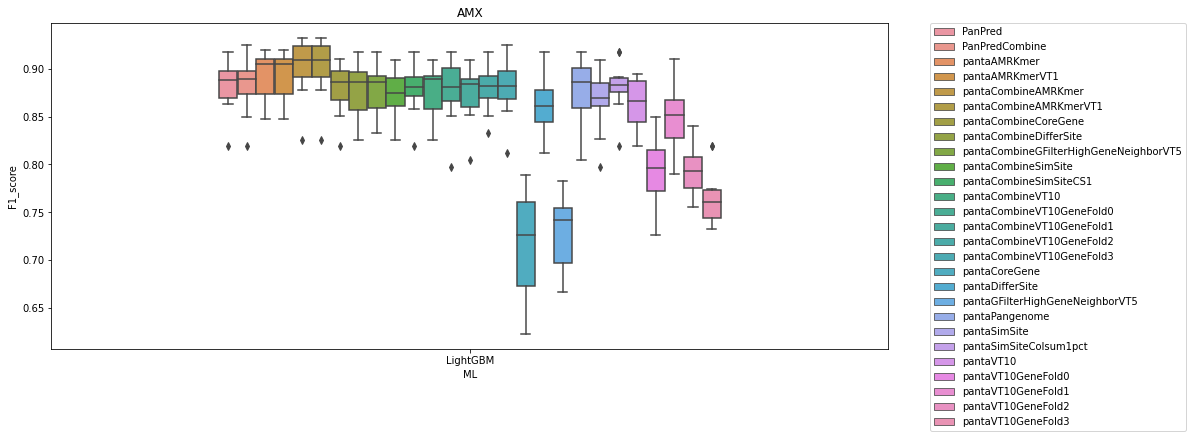

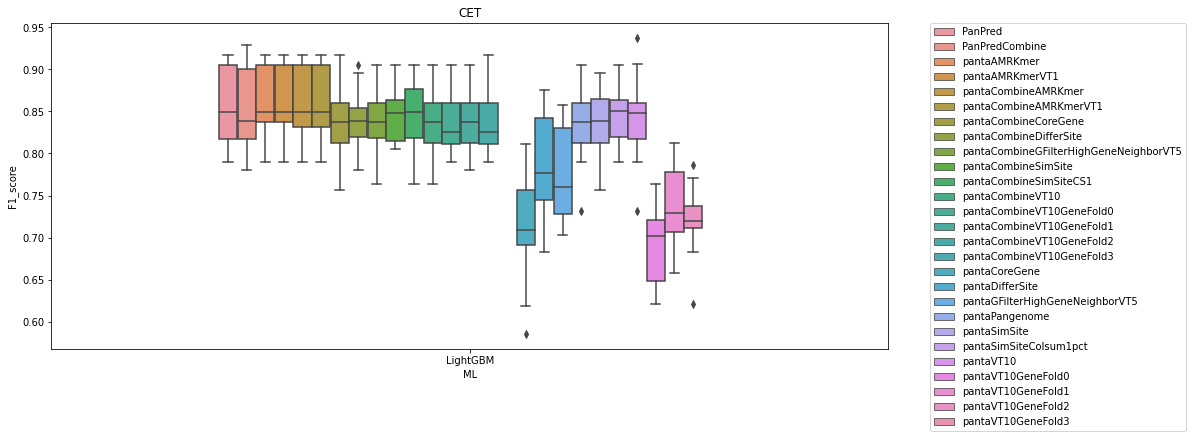

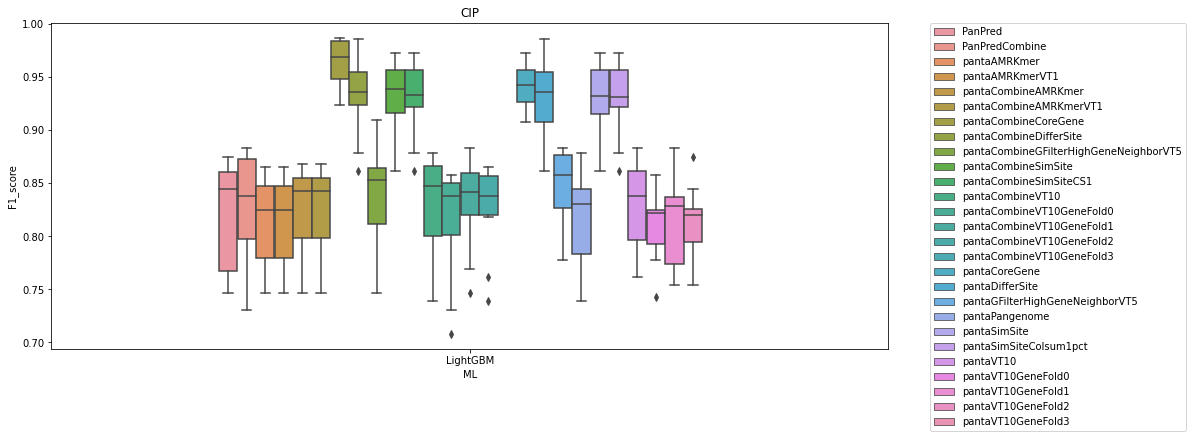

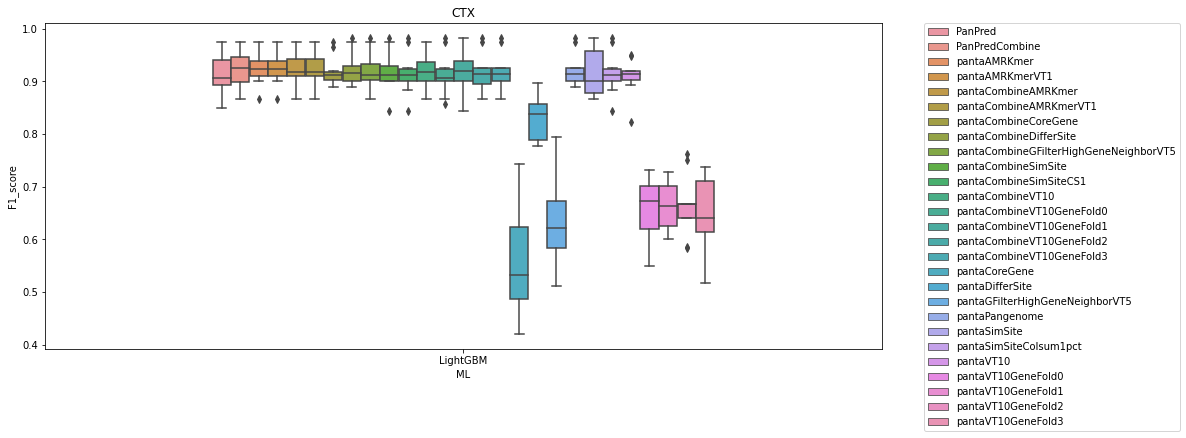

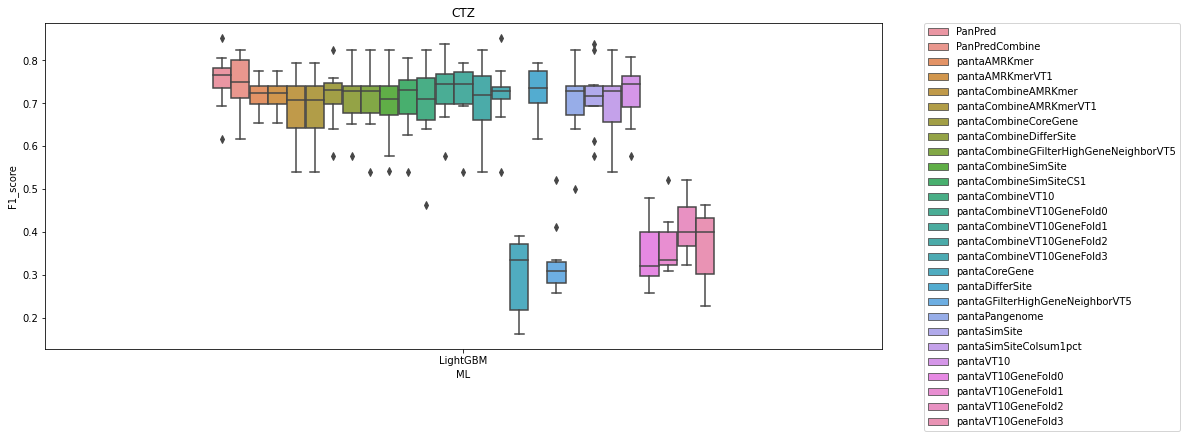

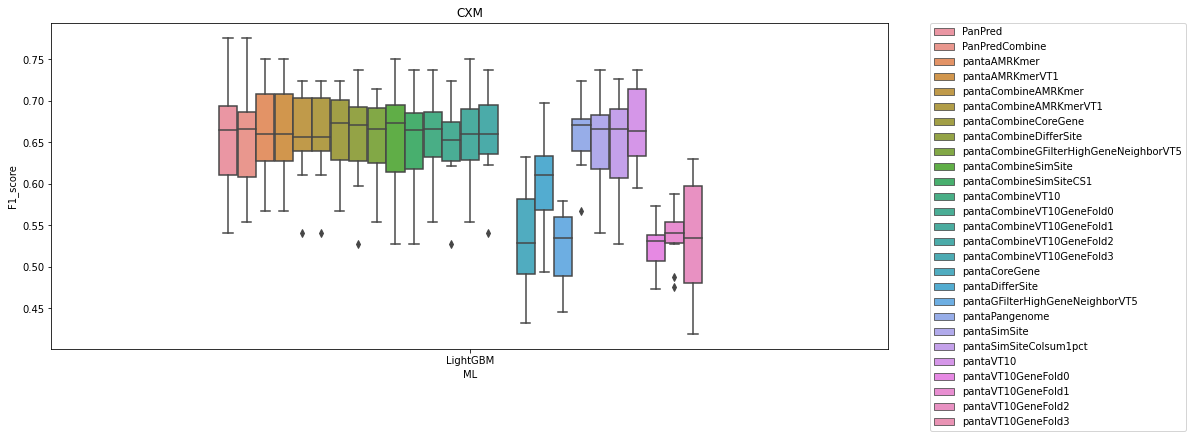

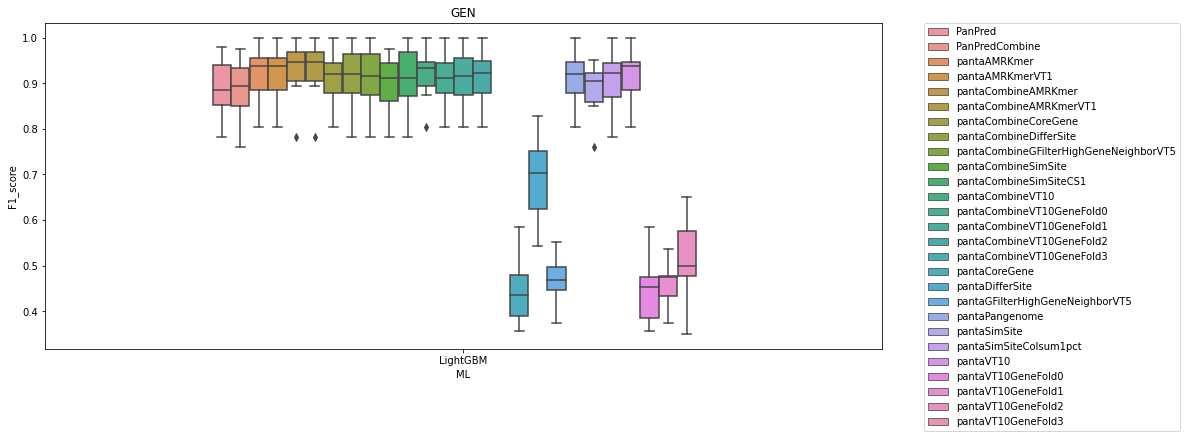

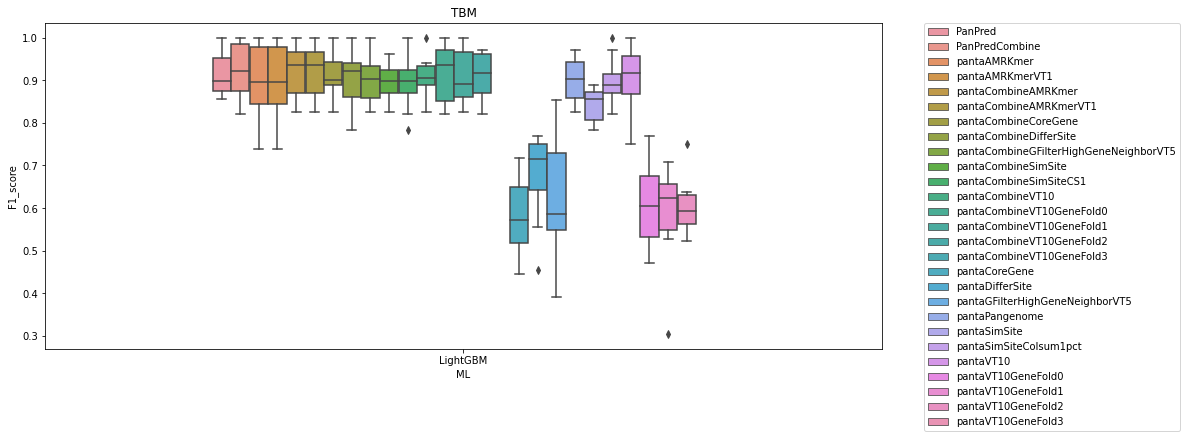

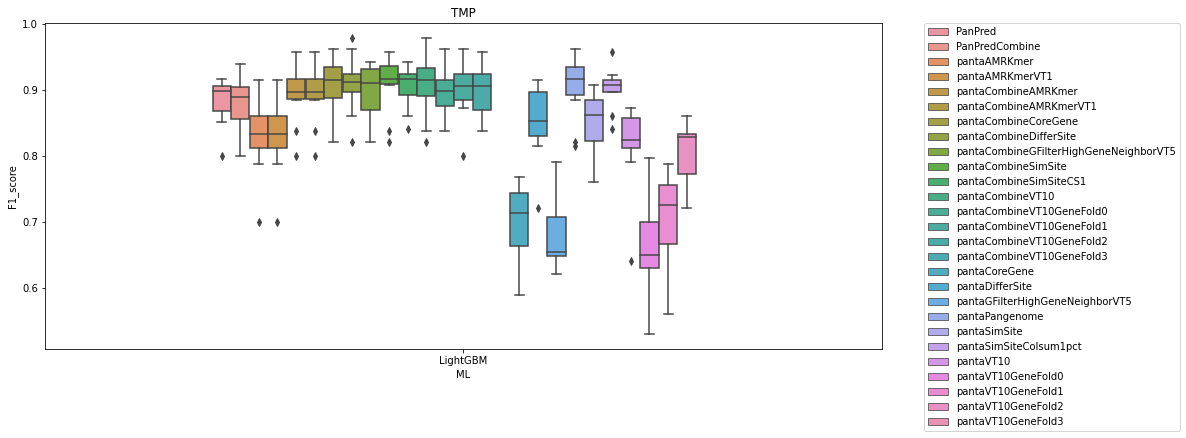

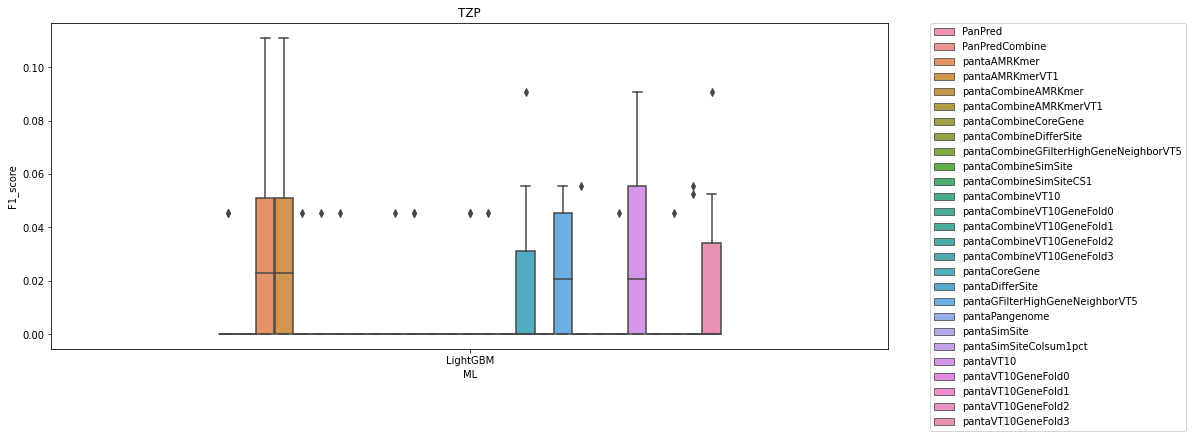

In [13]:
for amr in amr_list:
    df_subset = df[df["AMR"] == amr]
    # create grouped boxplot 
    plt.figure(figsize=(15,6))
    sns.boxplot(x = df_subset['ML'],
                y = df_subset['F1_score'],
                # y = df_subset['Accuracy'],
                hue = df_subset['Method'], width=0.6, order = ML_list, hue_order = method_list).set(title=amr)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [14]:
# for amr in amr_list:
#     df_subset = df[df["AMR"] == amr]
#     # create grouped boxplot 
#     plt.figure(figsize=(15,6))
#     sns.boxplot(x = df_subset['ML'],
#                 y = df_subset['F1_score'],
#                 # y = df_subset['Accuracy'],
#                 hue = df_subset['Method'], width=0.6, order = ML_list, hue_order = method_list).set(title=amr)
#     plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [15]:
# df_pan = df.loc[df['Method'].isin(['PanPred', 'pantaPangenome', 'pantaPangenomeNoHG', 'pantaPangenomeNoHGNoFS'])]
# df_pan = df.loc[df['Method'].isin(['PanPred', 'pantaCombineHighGeneNeighborVT5', 'pantaCombinehighGene', 'pantaHighGene','pantaHighGeneNeighborVT5' ])]
method_list_combine = [method_list[i] for i in range(len(method_list)) if (("Com" in method_list[i]) or ("Pred" in method_list[i]))]
df_pan = df.loc[df['Method'].isin(method_list_combine)]
# array(['PanPred', 'PanPredCombine', 'pantaCombineHighGeneNeighborVT5',
        # 'pantaCombineOneHotVT10', 'pantaCombineScale',
        # 'pantaCombinehighGene', 'pantaHighGene',
        # 'pantaHighGeneNeighborVT5', 'pantaOneHotVT10', 'pantaSnp',
        # 'pantaVT10'], dtype=object))

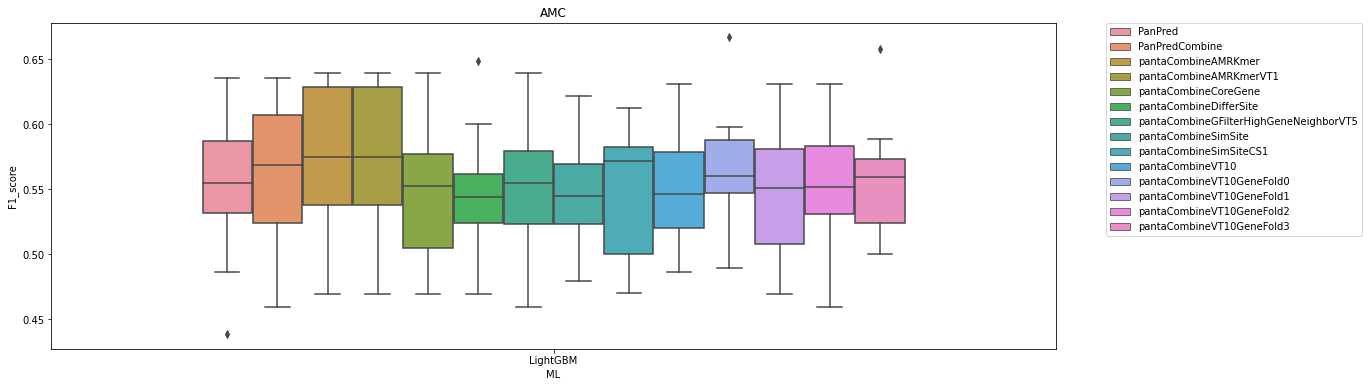

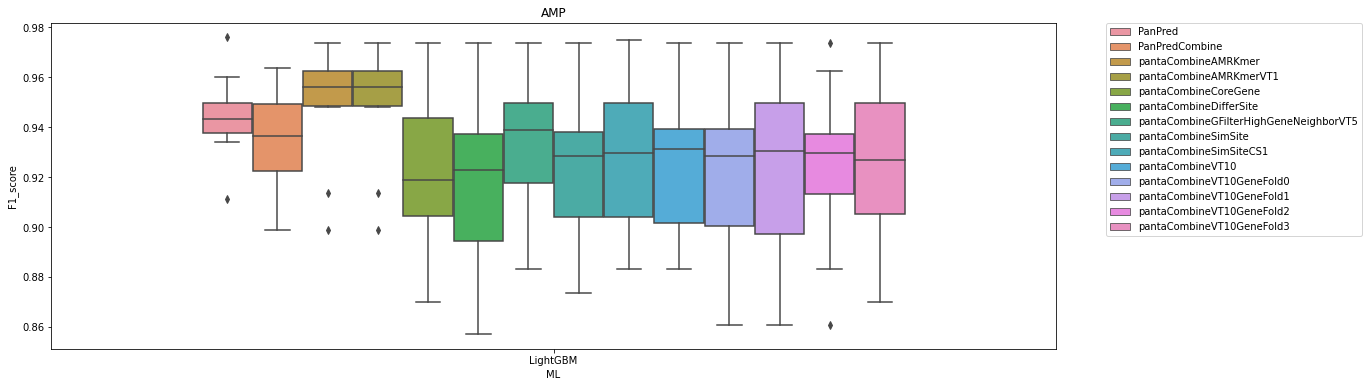

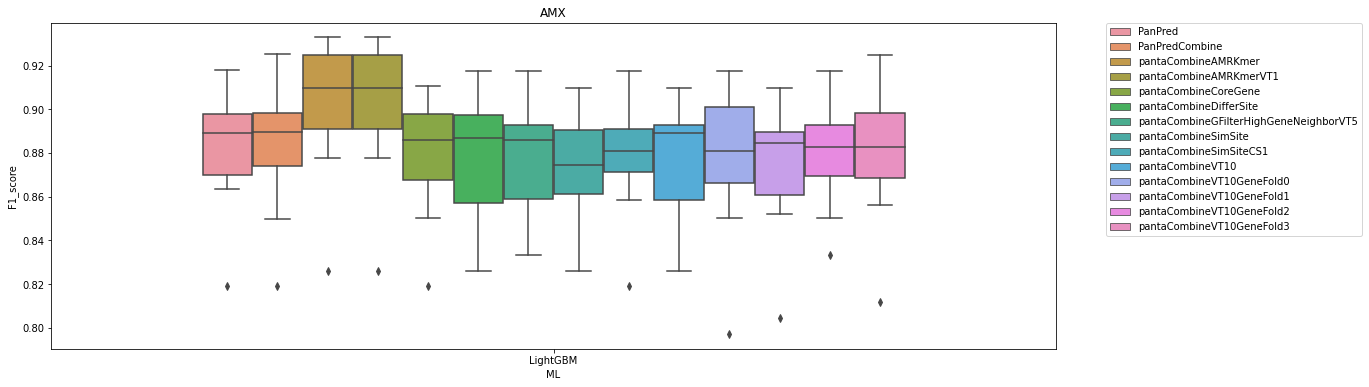

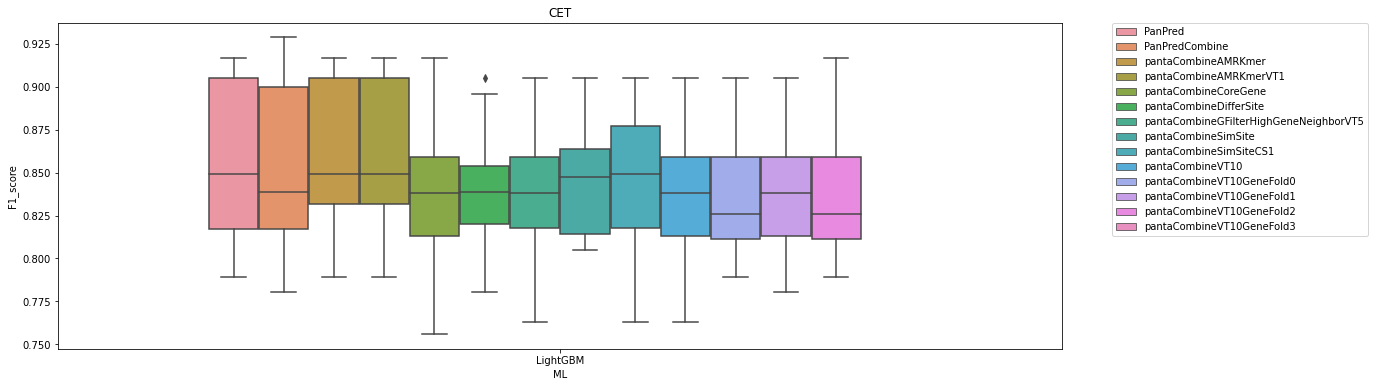

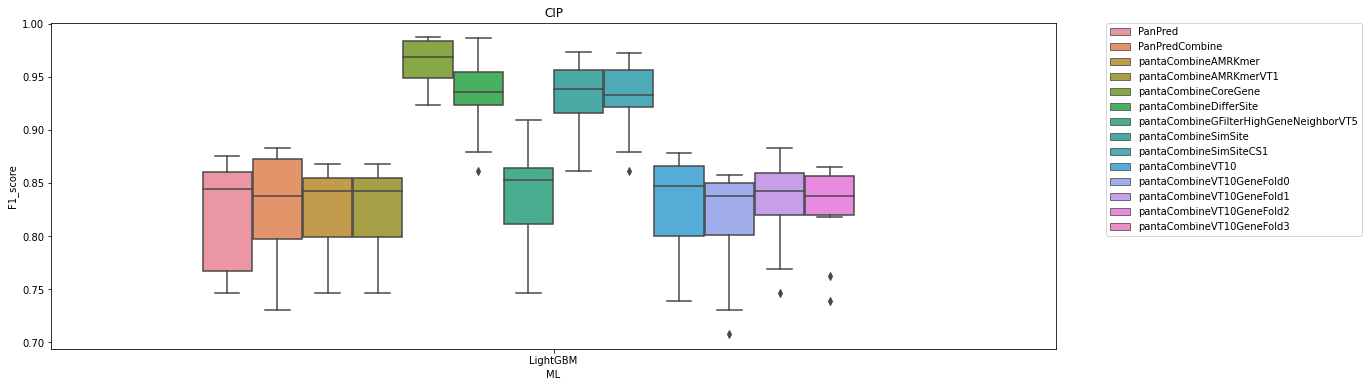

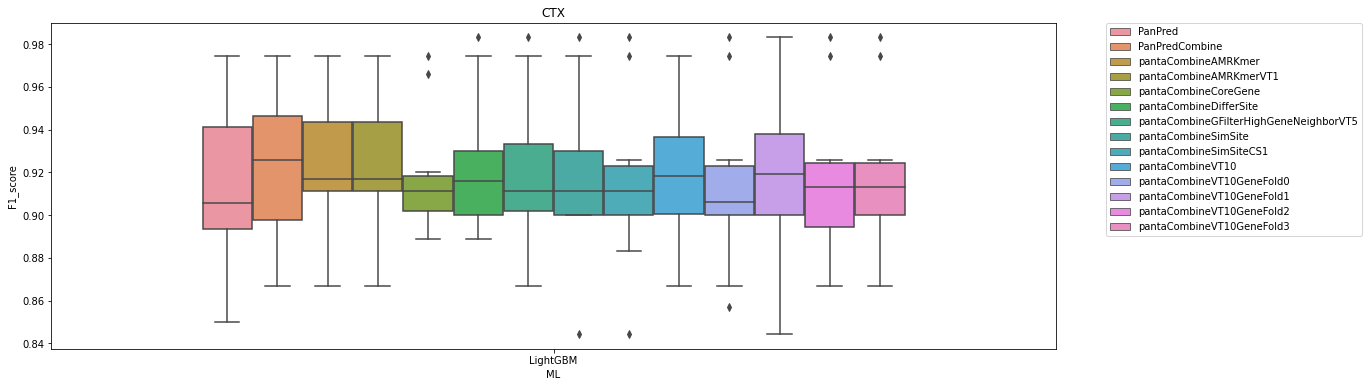

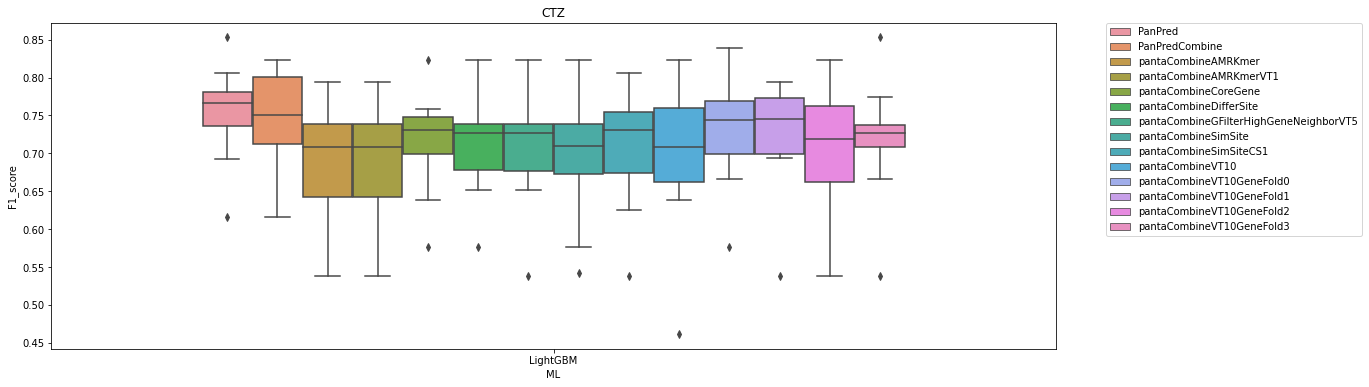

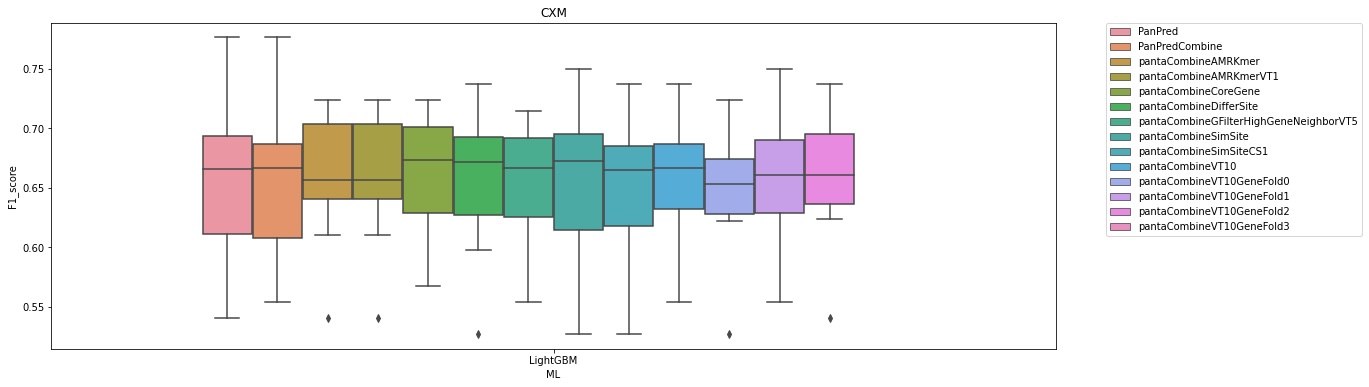

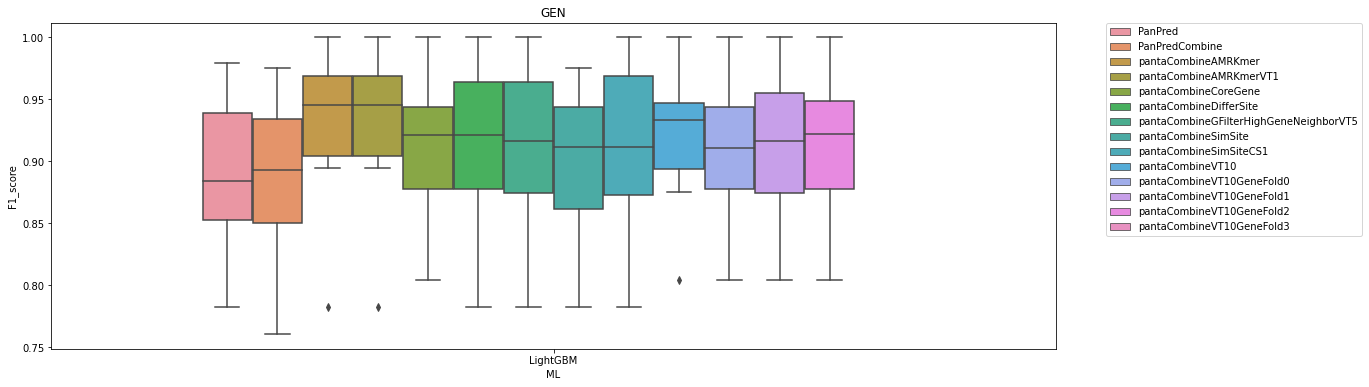

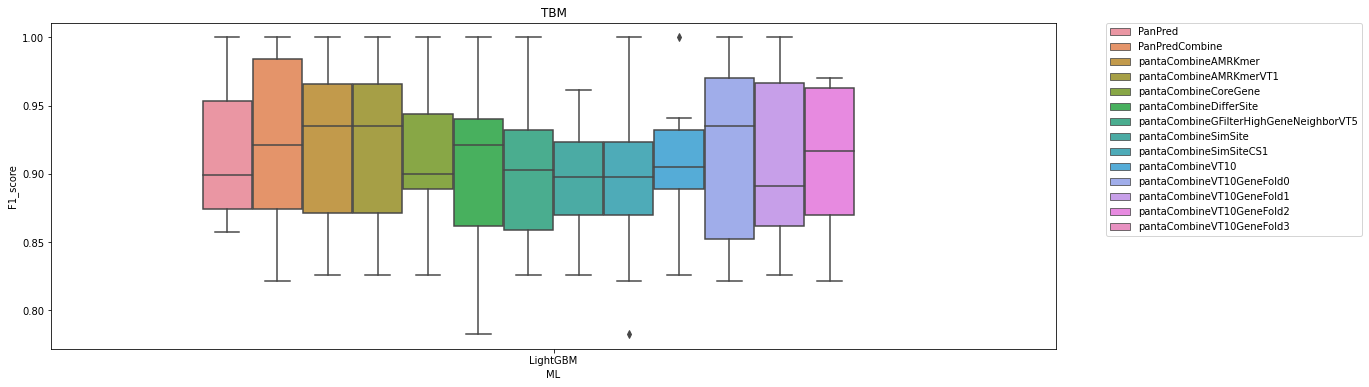

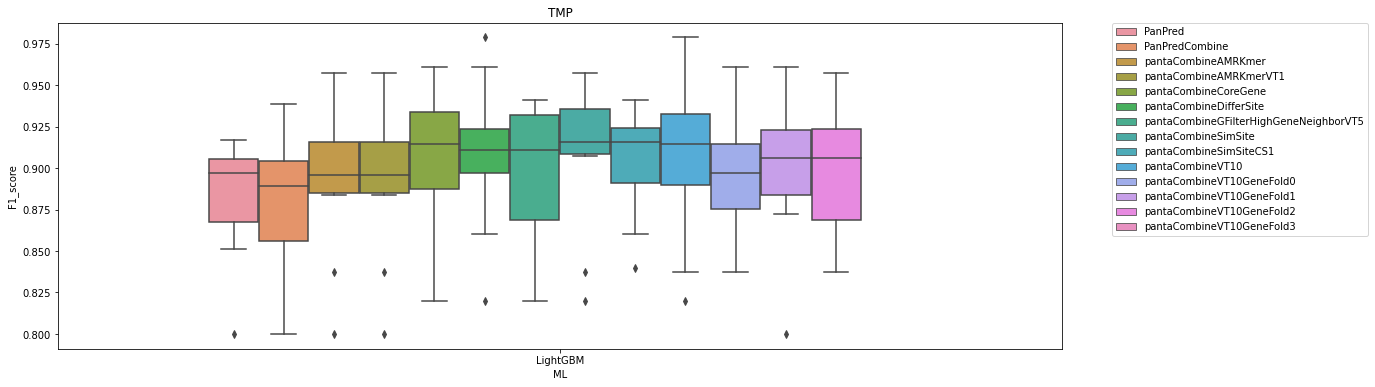

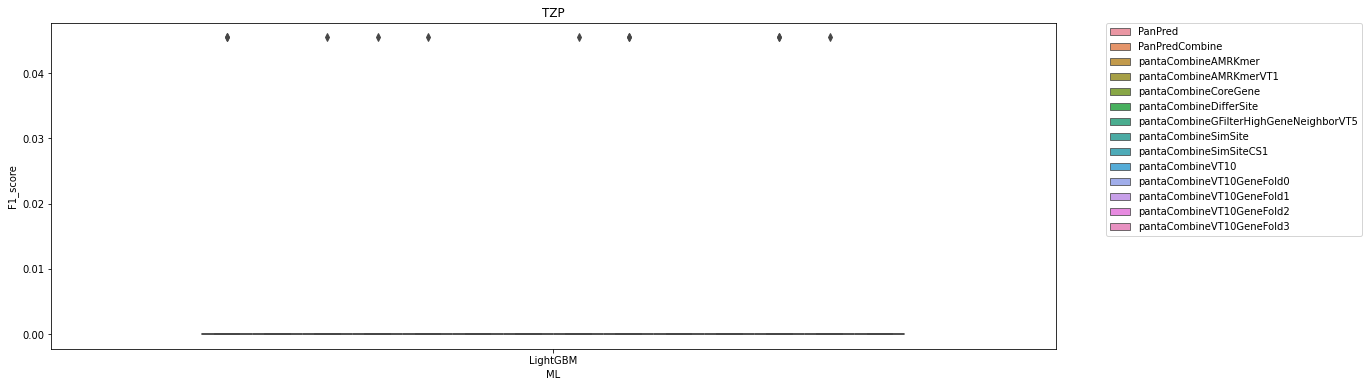

In [16]:
for amr in amr_list:
    df_subset = df_pan[df_pan["AMR"] == amr]
    # create grouped boxplot 
    plt.figure(figsize=(18,6))
    sns.boxplot(x = df_subset['ML'],
                y = df_subset['F1_score'],
                # y = df_subset['Accuracy'],
                hue = df_subset['Method'], width=0.7, order = ML_list, hue_order = np.unique(df_pan['Method'])).set(title=amr)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [17]:
# df_pan = df.loc[df['Method'].isin(['PanPred', 'pantaPangenome', 'pantaPangenomeNoHG', 'pantaPangenomeNoHGNoFS'])]
# df_pan = df.loc[df['Method'].isin(['PanPred', 'pantaCombineHighGeneNeighborVT5', 'pantaCombinehighGene', 'pantaHighGene','pantaHighGeneNeighborVT5' ])]
method_list_notcombine = [method_list[i] for i in range(len(method_list)) if "Com" not in method_list[i]]
df_pan = df.loc[df['Method'].isin(method_list_notcombine)]
# array(['PanPred', 'PanPredCombine', 'pantaCombineHighGeneNeighborVT5',
        # 'pantaCombineOneHotVT10', 'pantaCombineScale',
        # 'pantaCombinehighGene', 'pantaHighGene',
        # 'pantaHighGeneNeighborVT5', 'pantaOneHotVT10', 'pantaSnp',
        # 'pantaVT10'], dtype=object))

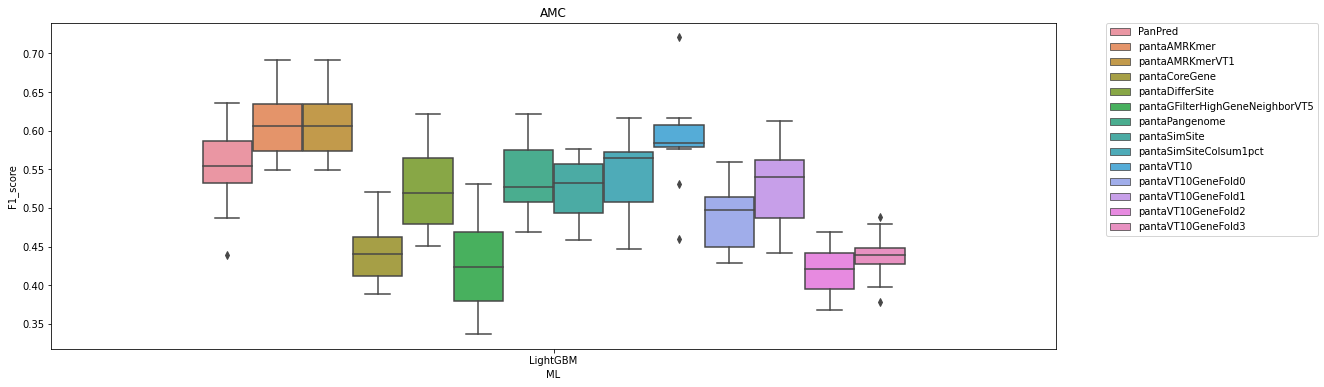

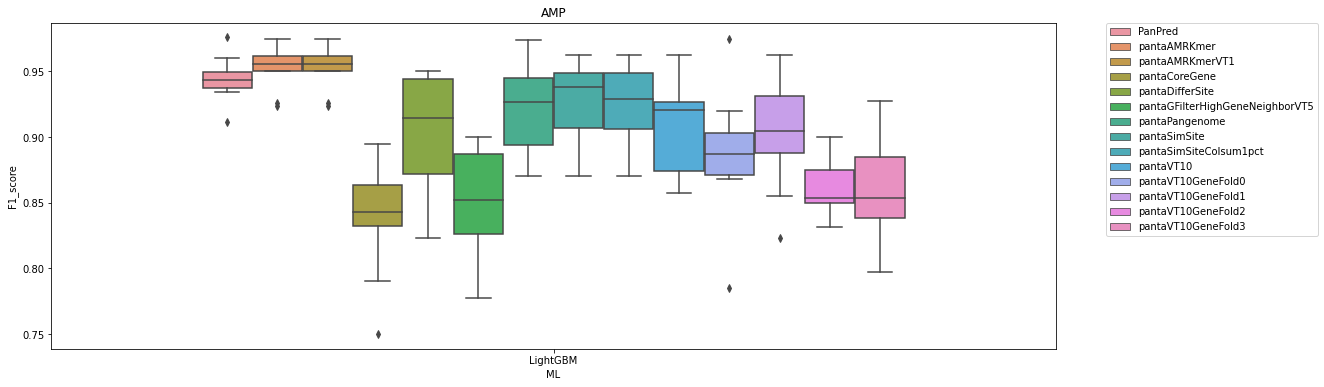

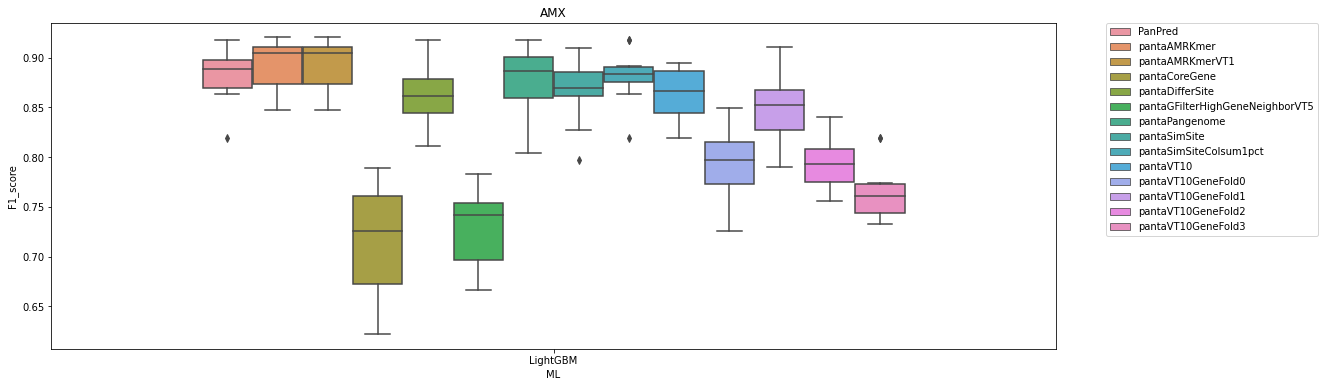

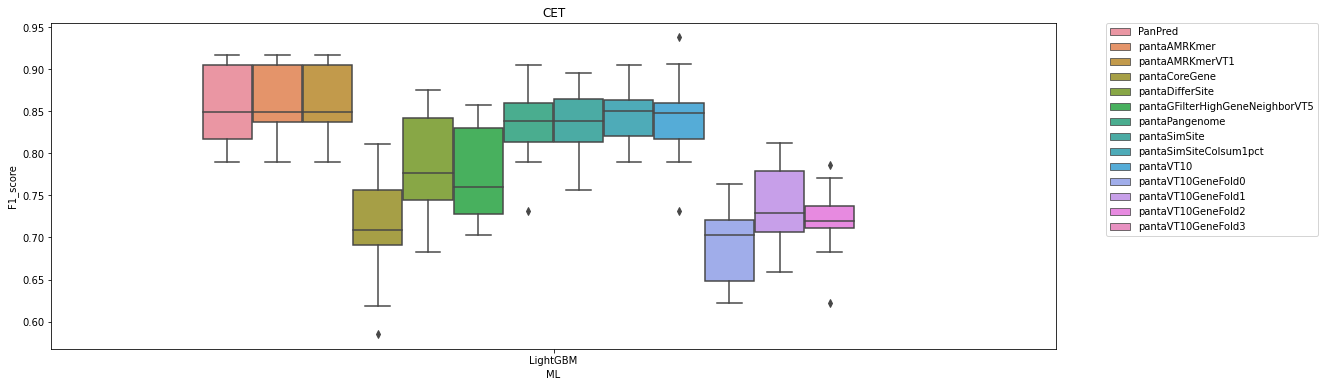

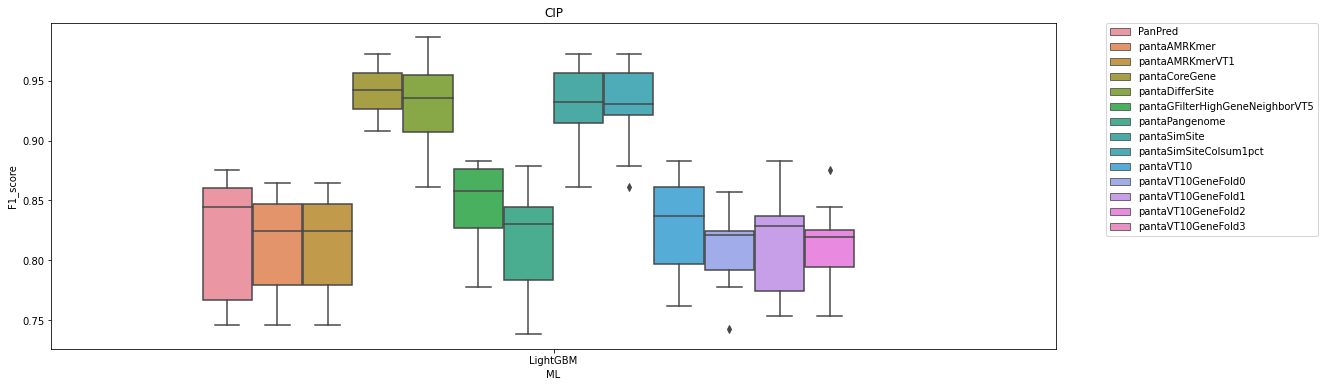

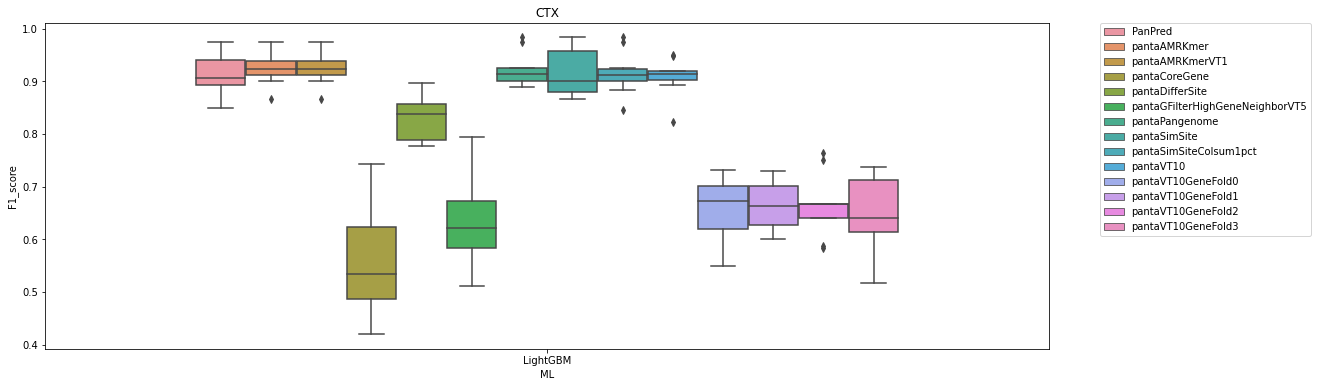

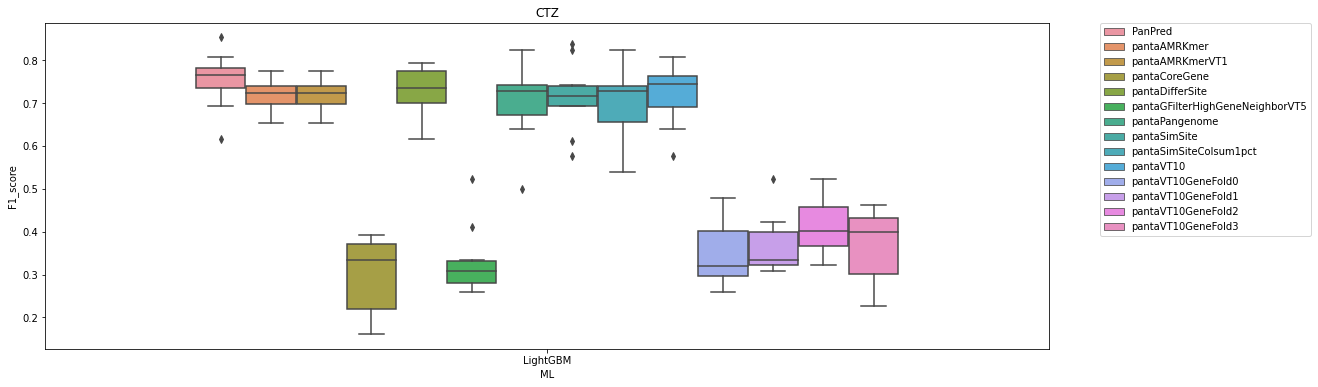

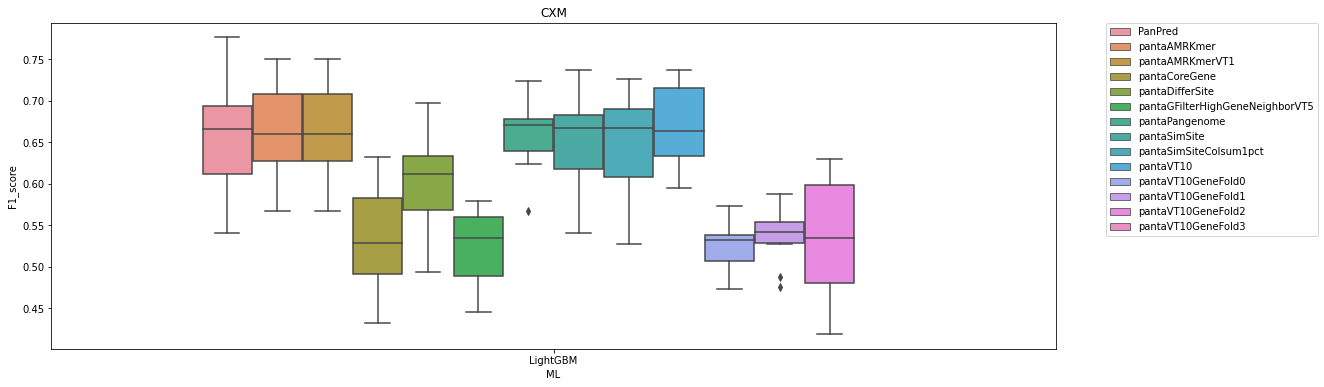

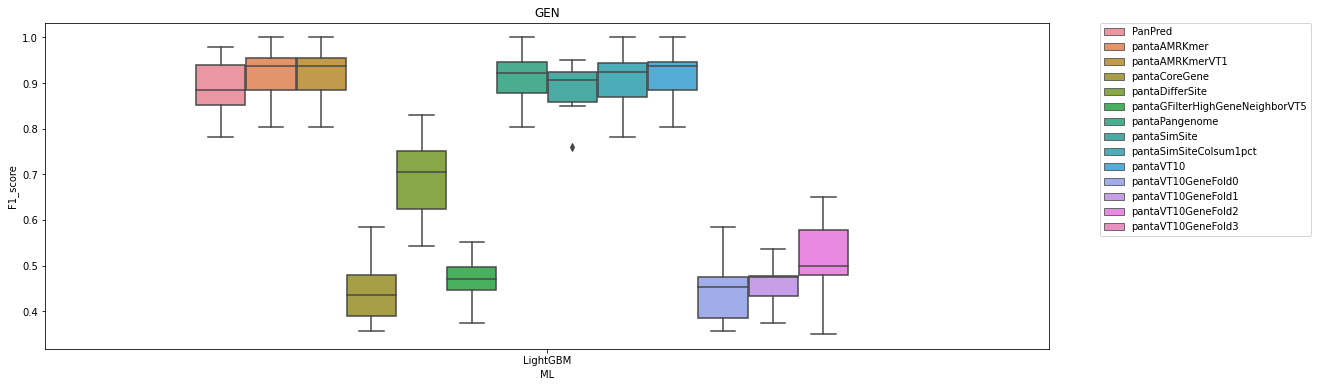

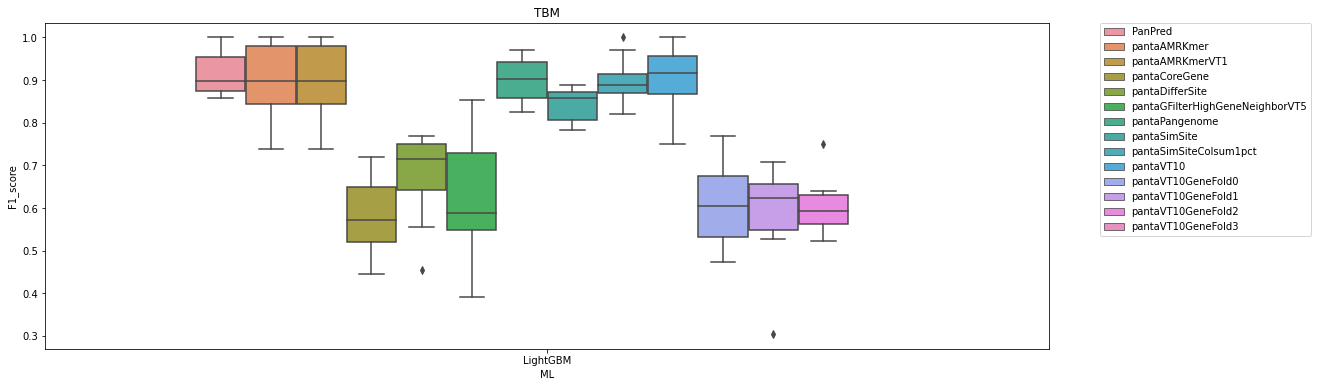

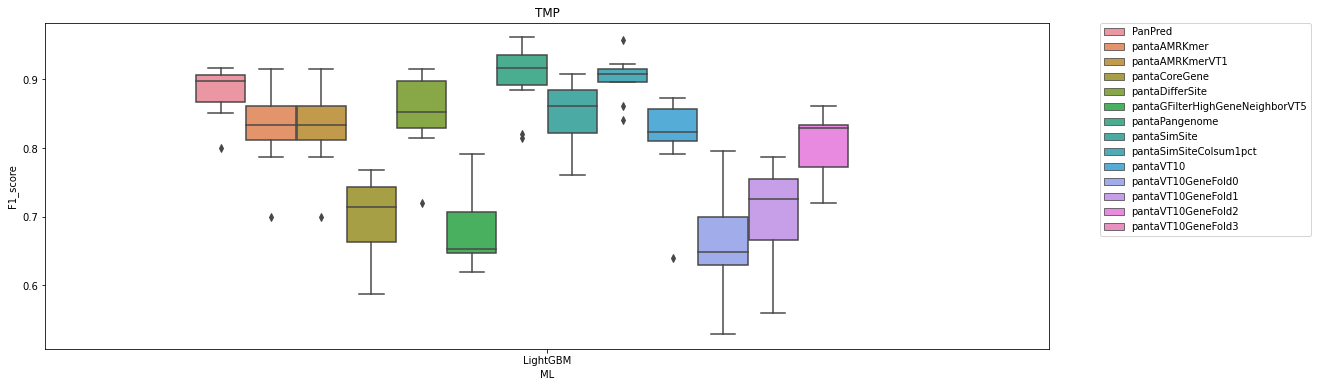

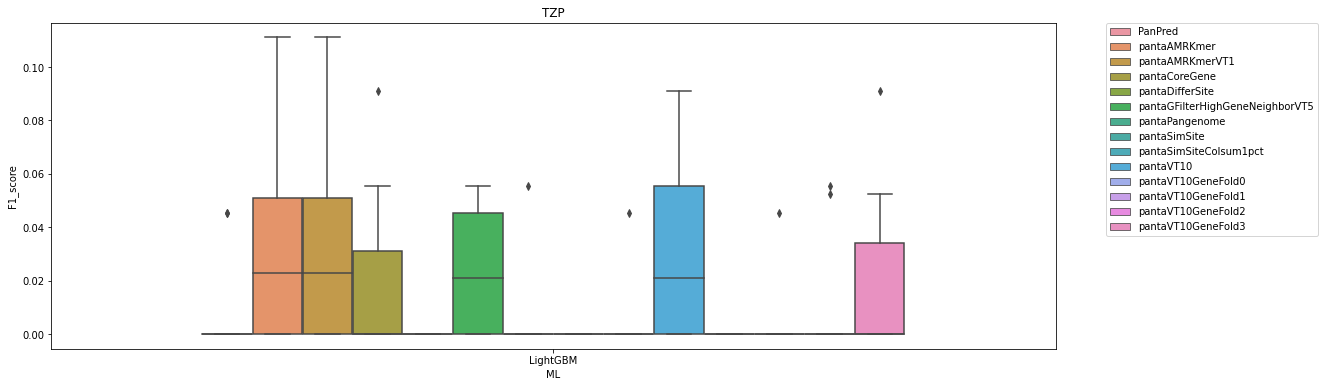

In [18]:
for amr in amr_list:
    df_subset = df_pan[df_pan["AMR"] == amr]
    # create grouped boxplot 
    plt.figure(figsize=(18,6))
    sns.boxplot(x = df_subset['ML'],
                y = df_subset['F1_score'],
                # y = df_subset['Accuracy'],
                hue = df_subset['Method'], width=0.7, order = ML_list, hue_order = np.unique(df_pan['Method'])).set(title=amr)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [19]:
# df_panta = df.loc[df['Method'].isin(['pantaCombine', 'pantaCombineNoHGNoFSFullSNP', 'pantaPangenome', 'pantaSnp', 'pantaPangenomeNoHGNoFS'])]

In [20]:
# method_list = np.unique(df_panta['Method'])
# for amr in amr_list:
#     df_subset = df_panta[df_panta["AMR"] == amr]
#     # create grouped boxplot 
#     plt.figure(figsize=(18,6))
#     sns.boxplot(x = df_subset['ML'],
#                 # y = df_subset['F1_score'],
#                 y = df_subset['Accuracy'],
#                 hue = df_subset['Method'], width=0.7, order = ML_list, hue_order = method_list).set(title=amr)
#     plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [21]:
# for data in data_dir:
#     if 'pantaCombineGeneFold' in data:
#         os.system('rm '+ data)